#IMPORT

In [2]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict
from scipy.stats.stats import pearsonr

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/My Drive/PROGETTO DATA MINING 1/pre_processed.csv')
data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
data

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,262328.0,Short Term,721.638848,1.372699e+06,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
1,Fully Paid,99999999.0,Short Term,741.000000,2.231892e+06,8 years,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
2,Fully Paid,176220.0,Short Term,721.638848,1.372699e+06,5 years,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0
3,Charged Off,206602.0,Short Term,729.000000,8.968570e+05,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0
4,Fully Paid,217646.0,Short Term,730.000000,1.184194e+06,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,13.0,1.0,122170.0,272052.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79528,Fully Paid,210584.0,Short Term,719.000000,7.833890e+05,1 year,Home Mortgage,Other,3727.61,17.4,6.0,0.0,456.0,259160.0,0.0,0.0
79529,Fully Paid,99999999.0,Short Term,732.000000,1.289416e+06,1 year,Rent,Debt Consolidation,13109.05,9.4,22.0,0.0,153045.0,509234.0,0.0,0.0
79530,Fully Paid,103136.0,Short Term,742.000000,1.150545e+06,6 years,Rent,Debt Consolidation,7315.57,18.8,12.0,1.0,109554.0,537548.0,1.0,0.0
79531,Fully Paid,530332.0,Short Term,746.000000,1.717524e+06,9 years,Rent,Debt Consolidation,9890.07,15.0,8.0,0.0,404225.0,738254.0,0.0,0.0


In [0]:
y = data['Loan Status']

In [0]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, df, y_train, y_test = train_test_split(
    data, y, test_size=0.33, random_state=42)

In [6]:
df

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
62600,Charged Off,449592.0,Long Term,731.000000,1.067781e+06,10+ years,Own Home,Debt Consolidation,9788.04,16.0,3.0,0.0,112537.0,157388.0,0.0,0.0
53522,Charged Off,174680.0,Short Term,730.000000,4.840820e+05,3 years,Rent,Debt Consolidation,9923.89,8.7,14.0,0.0,56677.0,142054.0,0.0,0.0
19057,Fully Paid,387926.0,Long Term,732.000000,1.263538e+06,10+ years,Home Mortgage,Debt Consolidation,22111.82,27.3,10.0,0.0,290681.0,593648.0,0.0,0.0
1447,Charged Off,446952.0,Long Term,721.638848,1.372699e+06,10+ years,Home Mortgage,Debt Consolidation,31668.44,21.5,13.0,0.0,298813.0,596530.0,0.0,0.0
68471,Charged Off,350240.0,Short Term,721.638848,1.372699e+06,10+ years,Rent,Debt Consolidation,17581.65,23.4,8.0,0.0,127680.0,291038.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13257,Charged Off,110286.0,Short Term,656.000000,7.656810e+05,10+ years,Home Mortgage,Debt Consolidation,17227.87,17.0,16.0,0.0,99560.0,302566.0,0.0,0.0
28109,Fully Paid,394174.0,Long Term,711.000000,1.985823e+06,10+ years,Home Mortgage,Debt Consolidation,13503.68,29.4,11.0,0.0,281333.0,790636.0,0.0,0.0
59944,Fully Paid,539066.0,Long Term,730.000000,2.458087e+06,10+ years,Home Mortgage,Debt Consolidation,9627.49,25.6,12.0,0.0,353742.0,724944.0,0.0,0.0
9313,Fully Paid,133034.0,Short Term,721.638848,1.372699e+06,10+ years,Rent,Debt Consolidation,21066.25,9.0,7.0,0.0,211242.0,292578.0,0.0,0.0


#DATA PREPARATION
rimuovo le variabili categoriali

In [0]:
df = df.drop(columns=['Loan Status', 'Term', 'Years in current job', 'Home Ownership',	'Purpose'])

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26246 entries, 62600 to 7776
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Current Loan Amount        26246 non-null  float64
 1   Credit Score               26246 non-null  float64
 2   Annual Income              26246 non-null  float64
 3   Monthly Debt               26246 non-null  float64
 4   Years of Credit History    26246 non-null  float64
 5   Number of Open Accounts    26246 non-null  float64
 6   Number of Credit Problems  26246 non-null  float64
 7   Current Credit Balance     26246 non-null  float64
 8   Maximum Open Credit        26246 non-null  float64
 9   Bankruptcies               26246 non-null  float64
 10  Tax Liens                  26246 non-null  float64
dtypes: float64(11)
memory usage: 2.4 MB


## Clustering Preprocessing - Normalization  
A good practice in clustering to avoid the bias given by the range of the different attribute is normalization.  
The most common adopted normalizations are: Z-Score and Min-Max

In [0]:
X = df.values

In [0]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [9]:
scaler = MinMaxScaler()
scaler.fit(df.values)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [0]:
df = pd.DataFrame(scaler.fit_transform(df.values), columns=df.columns, index=df.index)

In [11]:
df

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
62600,0.004282,0.879518,0.052101,0.071613,0.185351,0.053571,0.0,0.014265,0.002431,0.0,0.0
53522,0.001532,0.873494,0.021280,0.072607,0.076233,0.250000,0.0,0.007184,0.002195,0.0,0.0
19057,0.003665,0.885542,0.062438,0.161779,0.354260,0.178571,0.0,0.036847,0.009171,0.0,0.0
1447,0.004256,0.823126,0.068202,0.231699,0.267564,0.232143,0.0,0.037877,0.009216,0.0,0.0
68471,0.003288,0.823126,0.068202,0.128634,0.295964,0.142857,0.0,0.016185,0.004496,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
13257,0.000888,0.427711,0.036149,0.126046,0.200299,0.285714,0.0,0.012620,0.004674,0.0,0.0
28109,0.003728,0.759036,0.100578,0.098798,0.385650,0.196429,0.0,0.035662,0.012214,0.0,0.0
59944,0.005177,0.873494,0.125515,0.070439,0.328849,0.214286,0.0,0.044840,0.011200,0.0,0.0
9313,0.001116,0.823126,0.068202,0.154129,0.080717,0.125000,0.0,0.026777,0.004520,0.0,0.0


# K-Means

In [0]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Parameters:
* **n_clusters** (default 8): The number of clusters
* **n_init** (default 10): Number of time k-means will be run with different initial centroids. The final results will be the best output in terms of inertia.
* **max_iter** (default 300): Maximum number of iterations of the k-means algorithm for a single run.

In [0]:
kmeans = KMeans(n_clusters=2, n_init=20, max_iter=100)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=2, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    Sum_of_squared_distances.append(km.inertia_)

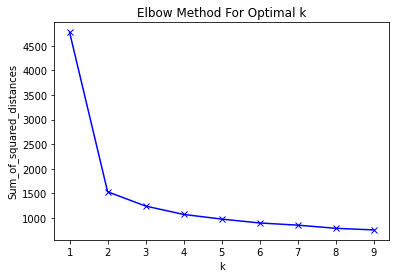

In [0]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Output:
* **labels_**: Labels of each point
* **cluster\_centers_**: Coordinates of cluster centers
* **inertia_**: Sum of squared distances of samples to their closest cluster center.

Labels

In [0]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

Observing the size of each cluster

In [0]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1], dtype=int32), array([22439,  3807]))

In [0]:
hist, bins = np.histogram(kmeans.labels_, 
                          bins=range(0, len(set(kmeans.labels_)) + 1))
dict(zip(bins, hist))

{0: 22439, 1: 3807}

Visualization of the clustering in two dimensions.

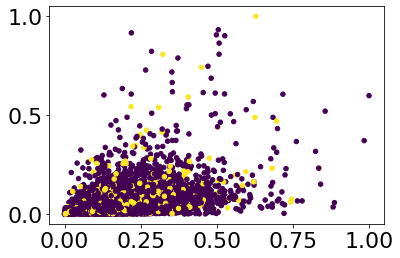

In [0]:
plt.scatter(df['Monthly Debt'], df['Current Credit Balance'], 
            c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

In [0]:
import plotly.express as px
#df = df.values
fig = px.scatter_3d(df, x='Current Loan Amount', y='Current Credit Balance', z='Credit Score',
              color=kmeans.labels_)
fig.show()

Centers

In [0]:
kmeans.cluster_centers_

array([[0.00285749, 0.82003879, 0.0677883 , 0.1339579 , 0.21908604,
        0.19832817, 0.0133473 , 0.03697137, 0.01063735, 0.02255894,
        0.00302549],
       [1.        , 0.84986439, 0.07032984, 0.13188217, 0.22289442,
        0.19779354, 0.0150162 , 0.03706554, 0.01091418, 0.02558445,
        0.00329802]])

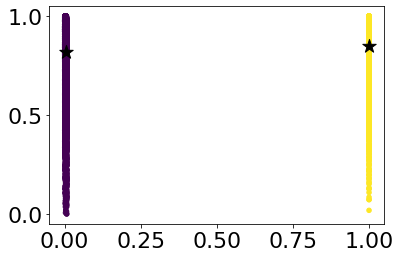

In [0]:
#centers = scaler.inverse_transform(kmeans.cluster_centers_)
centers = kmeans.cluster_centers_
plt.scatter(df['Current Loan Amount'], df['Credit Score'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 1], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

Visualization of clusters centers by means of parallel coordinates

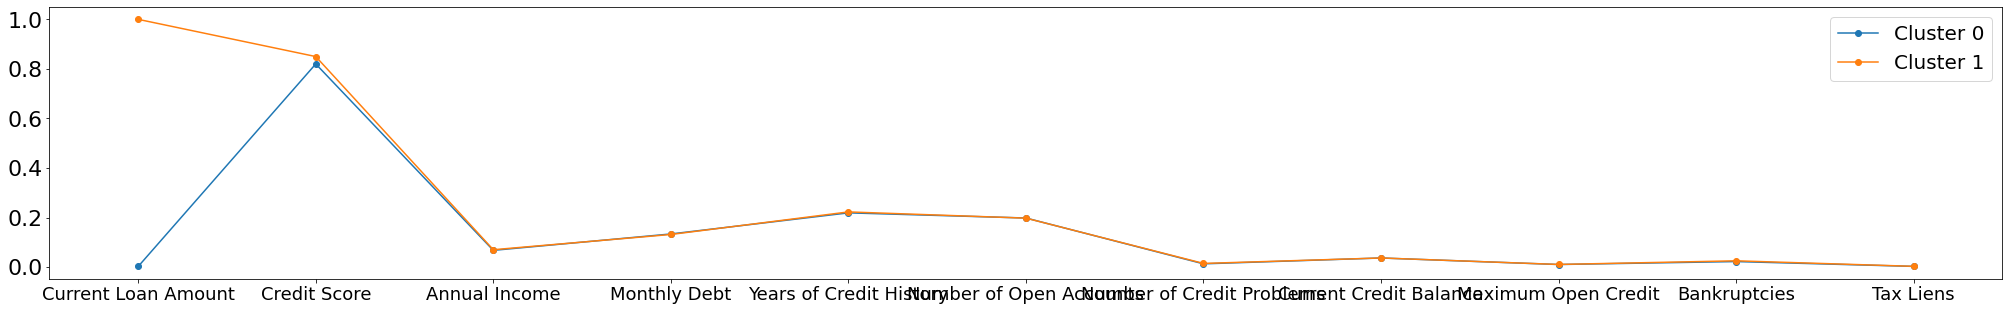

In [0]:
plt.figure(figsize=(35,5))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xticks(range(0, len(df.columns)), df.columns, fontsize=18)
plt.legend(fontsize=20)
plt.show()

SSE and Clustering Validation

In [0]:
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))

SSE 2821.1038092855847
Silhouette 0.9886492411544159


Knee Method to estimate the best K

In [0]:
sse_list = list()
max_k = 10

for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(df)
    
    sse = kmeans.inertia_
    sse_list.append(sse)

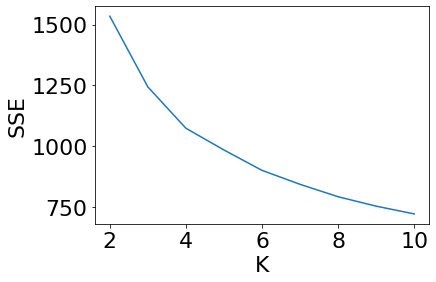

In [0]:
plt.plot(range(2, len(sse_list) + 2), sse_list)
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

Cluster % 2
Cluster % 3
Cluster % 4
Cluster % 5
Cluster % 6
Cluster % 7
Cluster % 8
Cluster % 9
Cluster % 10


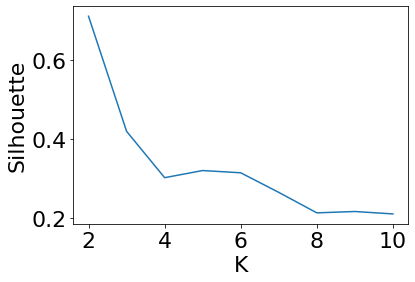

In [0]:
sil_list = list()
max_k = 10

for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(df)  
    sil = silhouette_score(df, kmeans.labels_)
    sil_list.append(sil)
    print('Cluster %', k)

plt.plot(range(2, len(sil_list) + 2), sil_list)
plt.ylabel('Silhouette', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

# DBSCAN

## The Algorithm in a Nutshell

* A point is a **core** if it has more than minPts points within eps
* A point is a **border** if it has less than minPts points within eps but one of its neighboors is a core point
* A **noise** point is neither a core or a border point


1. Label all points as core, border or noise points
1. Eliminate noise points.
1. Put an edge between all core points that are within eps of each other
1. Make each group of connected core points into a separate cluster.
1. Assign each border point to one of the clusters of its associated core points.

> Ester, M., Kriegel, H. P., Sander, J., & Xu, X. (1996, August). A density-based algorithm for discovering clusters in large spatial databases with noise. In Kdd (Vol. 96, No. 34, pp. 226-231).

Running [example](http://matlaspisa.isti.cnr.it:5055/Dbscan)  
Wikipedia [link](https://en.wikipedia.org/wiki/DBSCAN)

## DBSCAN Problems

* Parameter tuning
* Does not recognize different densities

## DBSCAN in Python ([sklearn](http://scikit-learn.org/stable/modules/clustering.html#dbscan))

In [0]:
from sklearn.cluster import DBSCAN

Parameters:
* **eps**: The maximum distance between two samples for them to be considered as in the same neighborhood.
* **min_samples**: The number of samples in a neighborhood for a point to be considered as a core point. This includes the point itself.

min samples = 5

In [58]:
dbscan = DBSCAN(eps=0.15, min_samples=50)
dbscan.fit(df)

DBSCAN(algorithm='auto', eps=0.15, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=50, n_jobs=None, p=None)

Output:
* **labels_**: Cluster labels for each point in the dataset. Noisy samples are given the label -1.

Labels

In [59]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0])

Observing the size of each cluster

In [60]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3,  4]),
 array([  885, 19646,  3135,  2175,   355,    50]))

Visualization of the clustering in two dimensions.

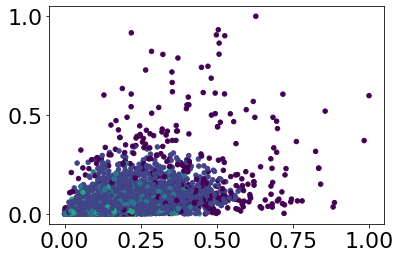

In [61]:
plt.scatter(df['Monthly Debt'], df['Current Credit Balance'], c=dbscan.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

In [47]:
df

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
62600,0.004282,0.879518,0.052101,0.071613,0.185351,0.053571,0.0,0.014265,0.002431,0.0,0.0
53522,0.001532,0.873494,0.021280,0.072607,0.076233,0.250000,0.0,0.007184,0.002195,0.0,0.0
19057,0.003665,0.885542,0.062438,0.161779,0.354260,0.178571,0.0,0.036847,0.009171,0.0,0.0
1447,0.004256,0.823126,0.068202,0.231699,0.267564,0.232143,0.0,0.037877,0.009216,0.0,0.0
68471,0.003288,0.823126,0.068202,0.128634,0.295964,0.142857,0.0,0.016185,0.004496,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
13257,0.000888,0.427711,0.036149,0.126046,0.200299,0.285714,0.0,0.012620,0.004674,0.0,0.0
28109,0.003728,0.759036,0.100578,0.098798,0.385650,0.196429,0.0,0.035662,0.012214,0.0,0.0
59944,0.005177,0.873494,0.125515,0.070439,0.328849,0.214286,0.0,0.044840,0.011200,0.0,0.0
9313,0.001116,0.823126,0.068202,0.154129,0.080717,0.125000,0.0,0.026777,0.004520,0.0,0.0


In [62]:
import plotly.express as px
#df = df.values
fig = px.scatter_3d(df, x='Current Loan Amount', y='Current Credit Balance', z='Credit Score',
              color=dbscan.labels_)
fig.show()

Clustering Validation

In [63]:
print('Silhouette %s' % silhouette_score(df, dbscan.labels_))

Silhouette 0.19918057361681488


Knee Method to estimate the best eps

In [0]:
from scipy.spatial.distance import pdist, squareform

In [0]:
dist = pdist(df, 'euclidean') #pair wise distance
print (dist)
dist = squareform(dist) #distance matrix given the vector dist
print()
print(dist)

[0.22701531 0.23018236 0.26137523 ... 0.28767074 0.17754342 0.29442427]

[[0.         0.22701531 0.23018236 ... 0.22991406 0.1626943  0.26065257]
 [0.22701531 0.         0.30516367 ... 0.27833861 0.16558717 0.20393589]
 [0.23018236 0.30516367 0.         ... 0.12024343 0.28602895 0.21064095]
 ...
 [0.22991406 0.27833861 0.12024343 ... 0.         0.28767074 0.17754342]
 [0.1626943  0.16558717 0.28602895 ... 0.28767074 0.         0.29442427]
 [0.26065257 0.20393589 0.21064095 ... 0.17754342 0.29442427 0.        ]]


In [0]:
k = 5
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

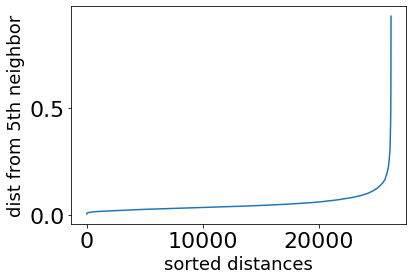

In [0]:
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

# Hierarchical Clustering

In [0]:
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

individua 7 clusters di partenza, tre di questi sono molto corposi gli altri sono costituiti da pochi record

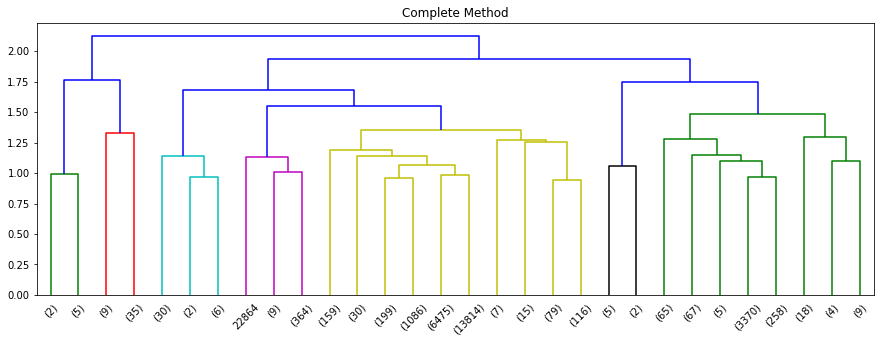

In [75]:
data_dist = pdist(df, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
plt.figure(figsize=(15, 5))
plt.title("Complete Method")
res = dendrogram(data_link, truncate_mode='lastp')

risultati molto simile al k means, due cluster molto corposi 

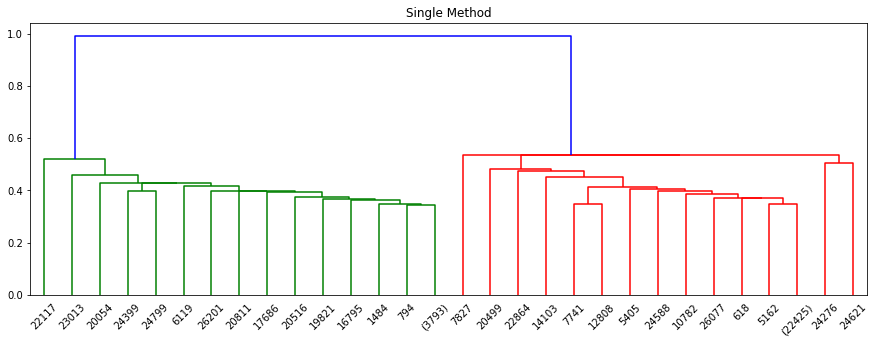

In [70]:
data_dist = pdist(df, metric='euclidean')
data_link = linkage(data_dist, method='single', metric='euclidean')
plt.figure(figsize=(15, 5))
plt.title("Single Method")
res = dendrogram(data_link, truncate_mode='lastp')

due cluster principali e altri 4 differenti

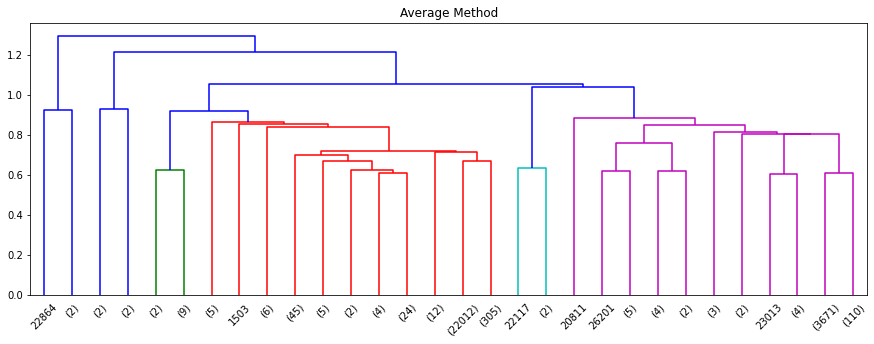

In [71]:
data_dist = pdist(df, metric='euclidean')
data_link = linkage(data_dist, method='average', metric='euclidean')

plt.figure(figsize=(15, 5))
plt.title("Average Method")
res = dendrogram(data_link, truncate_mode='lastp')

3 clusters principali e 3 gruppi di outliers di cui uno molto corposo

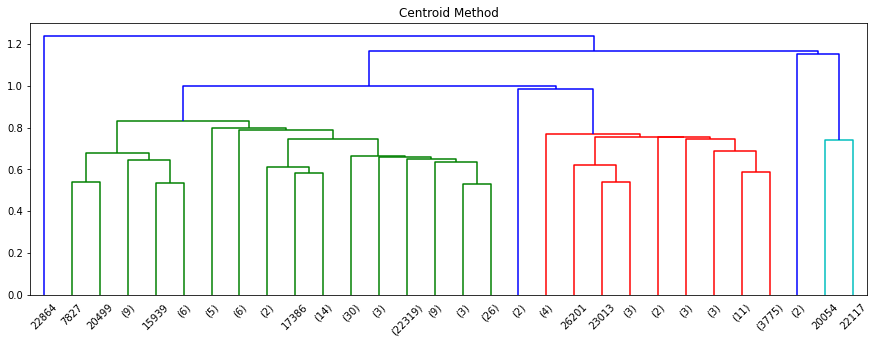

In [76]:
data_dist = pdist(df, metric='euclidean')
data_link = linkage(data_dist, method='centroid', metric='euclidean')

plt.figure(figsize=(15, 5))
plt.title("Centroid Method")
res = dendrogram(data_link, truncate_mode='lastp')